In [12]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# Load the data into a pandas dataframe
data = pd.read_csv("tfl-journeys-type.csv")

In [13]:
data.head()

,Period and Financial year,Reporting Period,Days in period,Period beginning,Period ending,Bus journeys (m),Underground journeys (m),DLR Journeys (m),Tram Journeys (m),Overground Journeys (m),Emirates Airline Journeys (m),TfL Rail Journeys (m),Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,01_10/11,1.0,31.0,01-Apr-10,01-May-10,189.1,90.5,6.3,2.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,02_10/11,2.0,28.0,02-May-10,29-May-10,181.6,84.5,5.8,2.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,03_10/11,3.0,28.0,30-May-10,26-Jun-10,175.9,84.3,5.8,2.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,04_10/11,4.0,28.0,27-Jun-10,24-Jul-10,183.4,86.5,6.1,2.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,05_10/11,5.0,28.0,25-Jul-10,21-Aug-10,160.4,82.9,5.8,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:

# Define the features and target
features = data[['Bus journeys (m)', 'Underground journeys (m)', 'DLR Journeys (m)']]
target = data['Tram Journeys (m)']





In [28]:
# Split the data into training and testing sets
data_size = len(features)
train_data_size = int(data_size * 0.8)
train_features = features[:train_data_size]
train_target = target[:train_data_size]
test_features = features[train_data_size:]
test_target = target[train_data_size:]


In [15]:
# Split the data into training and testing sets
train_features = features[:int(0.8*len(features))]
train_target = target[:int(0.8*len(target))]
test_features = features[int(0.8*len(features)):]
test_target = target[int(0.8*len(target)):]



In [26]:
import numpy as np


In [37]:
from sklearn.impute import SimpleImputer

# Create an imputer to replace missing values with the mean
imputer = SimpleImputer(strategy='mean')

# Fit the imputer to the data
imputer.fit(features)

# Transform the data to replace missing values with the mean
features = imputer.transform(features)


In [34]:
import numpy as np

# Identify the rows with missing values
missing_rows = np.isnan(features).any(axis=1)

# Keep only the rows without missing values
features = features[~missing_rows]
target = target[~missing_rows]


In [42]:
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.impute import SimpleImputer
model = HistGradientBoostingRegressor()
model.fit(train_features, train_target)

# Make predictions on the test data
predictions = model.predict(test_features)

# Evaluate the model's performance
error = abs(predictions - test_target)
print("Mean absolute error: ", error.mean())

Mean absolute error:  0.28260407923014785


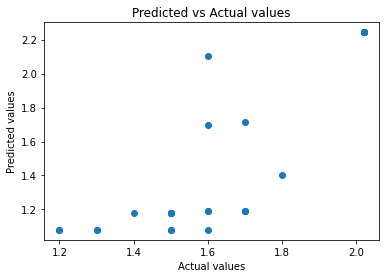

In [43]:
import matplotlib.pyplot as plt

# Plot the predictions against the actual values
plt.scatter(test_target, predictions)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Predicted vs Actual values")
plt.show()
